# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [41]:
# Code Here
from palmerpenguins import load_penguins
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(123)
random.seed(123)

df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [42]:
# Create dummy variables for categorical columns
df_dummified = pd.get_dummies(df, columns=['species', 'island', 'sex'], dtype = float)

# Display the first few rows of the transformed dataset
df_dummified.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,NaN,NaN,NaN,NaN,2007,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,36.7,19.3,193.0,3450.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [43]:
# Drop all rows with missing values
df_dummified = df_dummified.dropna()

# Quantitative variables for standardization
quantitative_vars = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()

# Standardize only the quantitative variables
df_dummified[quantitative_vars] = scaler.fit_transform(df_dummified[quantitative_vars])

# Set up target variable and predictors
y = df_dummified['bill_depth_mm']
X = df_dummified.drop(columns=['bill_depth_mm'])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Define the specified predictors list
predictors_list = [
    ['bill_length_mm'],  # Model 1: Single Quantitative variable
    ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'],  # Model 2: All quantitative variables
    ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'sex_female'],  # Model 3: Quantitative and Sex Variable (Male for reference)
    ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Adelie', 'species_Chinstrap']  # Model 4: Quantitative and Species Variable (Gentoo for reference)
]

# Train each model, calculate training and test errors
train_errors = []
test_errors = []
model_flexibility = [len(predictors) for predictors in predictors_list]

for i, predictors in enumerate(predictors_list, start=1):
    X_train_subset = X_train[predictors]
    X_test_subset = X_test[predictors]
    
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# data for plot
error_data = pd.DataFrame({
    'Model Flexibility': model_flexibility * 2,
    'Mean Squared Error': train_errors + test_errors,
    'Dataset': ['Training'] * len(train_errors) + ['Test'] * len(test_errors)
})

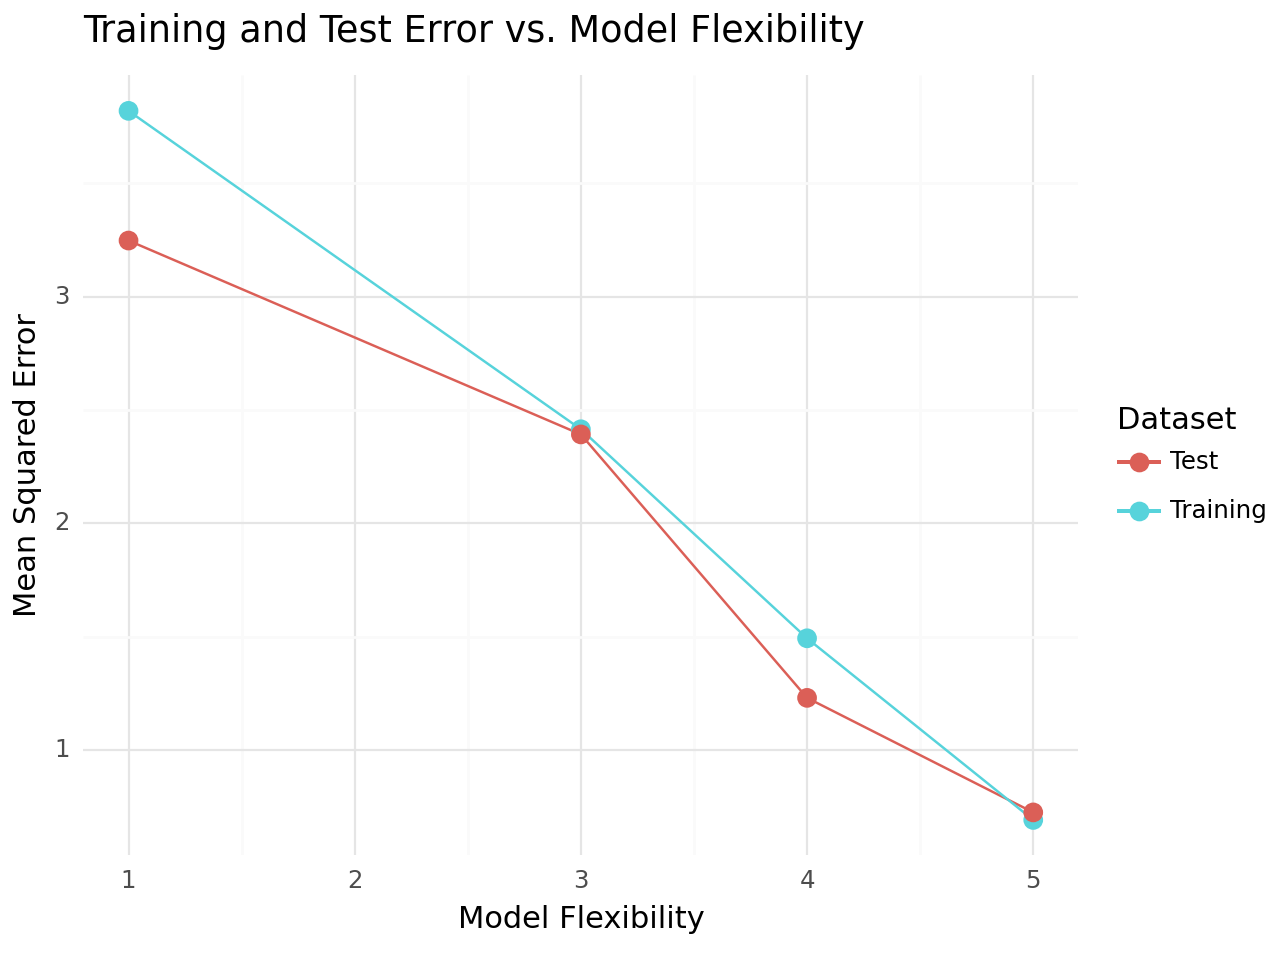

In [44]:
plot = (
    ggplot(error_data, aes(x='Model Flexibility', y='Mean Squared Error', color='Dataset')) +
    geom_line(aes(group='Dataset')) +
    geom_point(size=3) +
    labs(title='Training and Test Error vs. Model Flexibility',
         x='Model Flexibility',
         y='Mean Squared Error') +
    theme_minimal()
)
# Explicitly display the plot
print(plot)

From the plot above, it appears that **Model 4** (using 5 predictors: `bill_length_mm`, `flipper_length_mm`, `body_mass_g`, `species_Adelie`, and `species_Chinstrap`) again shows the lowest test error with training and test errors closely aligned, indicating a good balance between underfitting and overfitting. This model, with the highest flexibility among the four tested, achieves the most accurate prediction of `bill_depth_mm`, suggesting it captures the underlying relationship well without overfitting. The decreasing trend in test error as flexibility increases confirms that adding these predictors improves model performance, making Model 4 the best choice.